In [574]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readTraceData

In [575]:
# Solenoid parameters:
L = 300 # mm
a = 360 # mm
b = 500 # mm
J = -80.46 # A/mm^2
pitch = 0.8 # degrees

# Constants:
mu0 = 1.2e-3 # kg*mm/s^2/A^2

# Define function to plot lines indicating solenoid placement:
def plot_solenoid(ax):
    ax.axvspan(xmin=-L/2, xmax=L/2, color='gray', alpha=0.1, zorder=-1)

### Particle tracking

In [576]:
# Read-in data:
data = readTraceData('ReferenceParticle.txt')

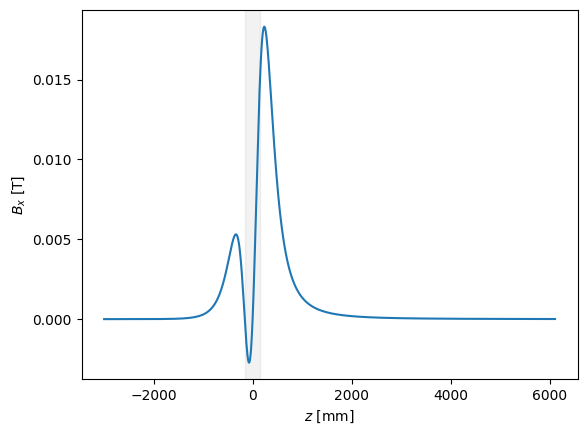

In [577]:
# Plot B_x vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bx'], color='tab:blue')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_x$ [T]')
plt.show()

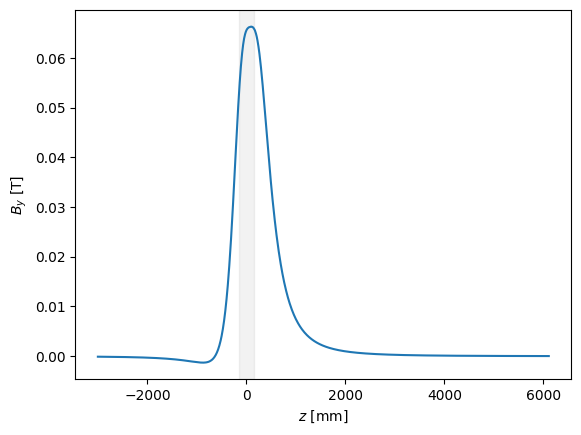

In [578]:
# Plot B_y vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['By'], color='tab:blue')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_y$ [T]')
plt.show()

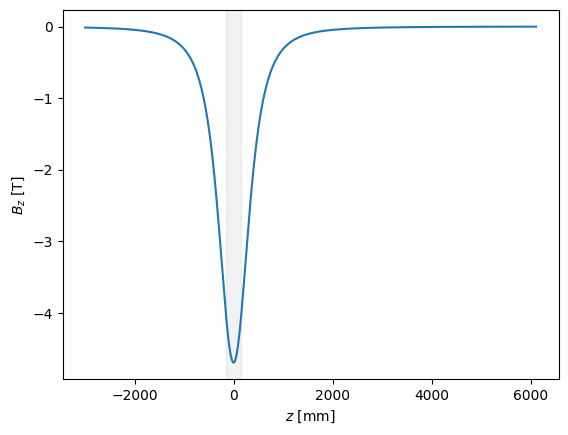

In [579]:
# Plot B_z vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bz'], color='tab:blue')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.show()

### Analytical approach

In [580]:
# Analytical formula for B field from Fernow paper:
def B(z):
    B = mu0*J/2 * ( (L-z) * math.log( ( b + np.sqrt( b**2 + (L-z)**2 ) ) / ( a + np.sqrt( a**2 + (L-z)**2 ) ) ) + (L+z) * math.log( ( b + np.sqrt( b**2 + (L+z)**2 ) ) / ( a + np.sqrt( a**2 + (L+z)**2)) ) )
    return B

In [581]:
# Compute B with same z sampling:
Bx_vals, By_vals, Bz_vals = [], [], []
for z in data['z']:
    Bx_vals.append(0)
    By = -B(z)*np.sin(pitch*math.pi/180)
    By_vals.append(By)
    Bz = B(z)*np.cos(pitch*math.pi/180)
    Bz_vals.append(Bz)

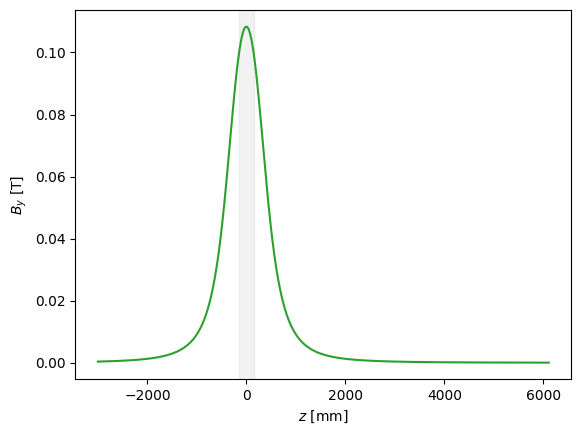

In [582]:
# Plot B_y vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], By_vals, color='tab:green')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_y$ [T]')
plt.show()

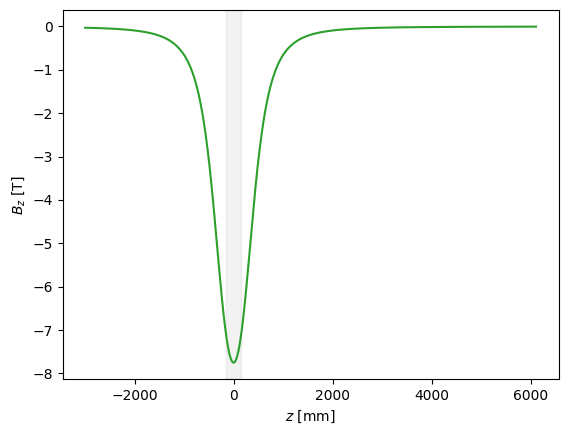

In [583]:
# Plot B_z vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], Bz_vals, color='tab:green')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.show()

### Comparison

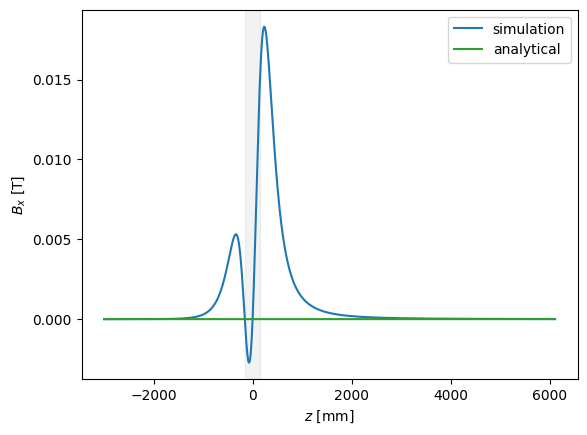

In [584]:
# Plot B_x vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bx'], color='tab:blue', label='simulation')
plt.plot(data['z'], Bx_vals, color='tab:green', label='analytical')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_x$ [T]')
plt.legend()
plt.show()

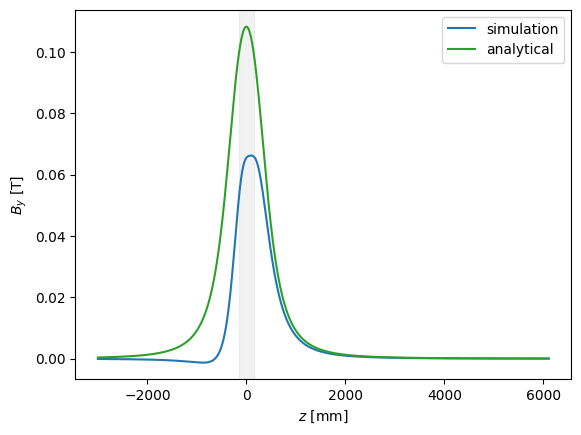

In [585]:
# Plot B_y vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['By'], color='tab:blue', label='simulation')
plt.plot(data['z'], By_vals, color='tab:green', label='analytical')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_y$ [T]')
plt.legend()
plt.show()

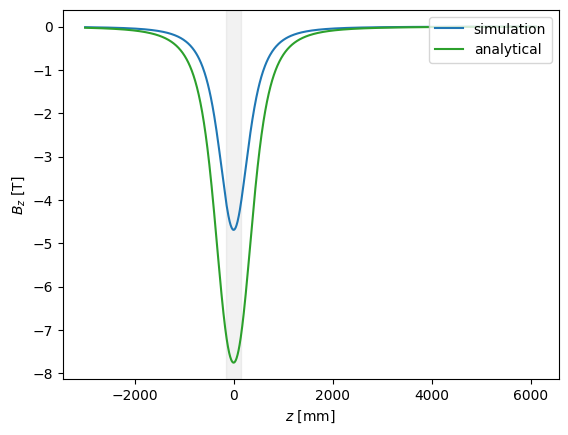

In [586]:
# Plot B_z vs. z:
fig, ax = plt.subplots()
plt.plot(data['z'], data['Bz'], color='tab:blue', label='simulation')
plt.plot(data['z'], Bz_vals, color='tab:green', label='analytical')
plot_solenoid(ax)
plt.xlabel('$z$ [mm]')
plt.ylabel('$B_z$ [T]')
plt.legend(loc='upper right')
plt.show()